In [1]:
# pip install yfinance

In [2]:
import yfinance as yf

In [3]:
from datetime import datetime
end = datetime.now()
start = datetime(end.year-20, end.month, end.day)

In [4]:
stock = "GOOG"
google_data = yf.download(stock, start, end)

[*********************100%***********************]  1 of 1 completed


In [5]:
google_data.head()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG,GOOG
Date,,,,,,
2004-12-23,4.663202,4.679958,4.697393,4.632636,4.668750,145125936
2004-12-27,4.762721,4.779834,4.814454,4.709846,4.711092,245079187
2004-12-28,4.783816,4.801005,4.820681,4.757418,4.784815,166453579
2004-12-29,4.787291,4.804492,4.819934,4.776596,4.776596,107525527
2004-12-30,4.903933,4.921553,4.937244,4.778340,4.806235,237057231


In [6]:
google_data.shape

(5034, 6)

In [7]:
google_data.describe()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG,GOOG
count,5034.000000,5034.000000,5034.000000,5034.000000,5034.000000,5.034000e+03
mean,48.359950,48.524510,49.015520,48.018409,48.503127,1.092489e+08
std,46.248537,46.389767,46.874159,45.900857,46.358046,1.422644e+08
min,4.342810,4.358414,4.443345,4.298140,4.366135,1.584340e+05
25%,13.278713,13.326424,13.449961,13.200895,13.341990,2.660900e+07
50%,27.941626,28.042023,28.334915,27.858016,28.118052,5.091506e+07
75%,64.094574,64.324873,64.701498,63.416188,63.845375,1.330338e+08
max,198.160004,198.160004,202.880005,196.690002,198.529999,1.650833e+09


In [8]:
google_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5034 entries, 2004-12-23 to 2024-12-23
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Adj Close, GOOG)  5034 non-null   float64
 1   (Close, GOOG)      5034 non-null   float64
 2   (High, GOOG)       5034 non-null   float64
 3   (Low, GOOG)        5034 non-null   float64
 4   (Open, GOOG)       5034 non-null   float64
 5   (Volume, GOOG)     5034 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 275.3 KB


In [9]:
google_data.isna().sum()

,,0
Price,Ticker,
Adj Close,GOOG,0
Close,GOOG,0
High,GOOG,0
Low,GOOG,0
Open,GOOG,0
Volume,GOOG,0


In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'Closing price of Google data')

<Figure size 1500x500 with 0 Axes>

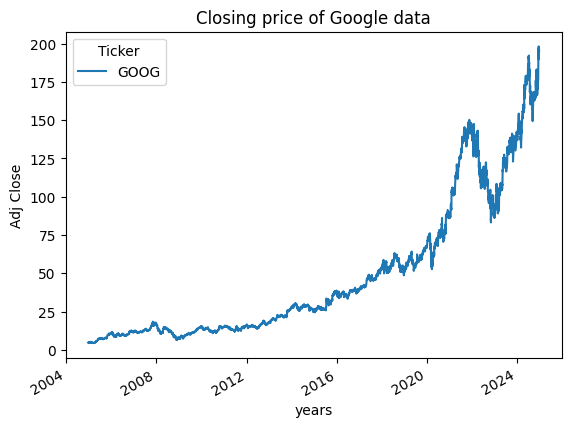

In [11]:
plt.figure(figsize = (15,5))
google_data['Adj Close'].plot()
plt.xlabel("years")
plt.ylabel("Adj Close")
plt.title("Closing price of Google data")

In [12]:
def plot_graph(figsize, values, column_name):
    plt.figure()
    values.plot(figsize = figsize)
    plt.xlabel("years")
    plt.ylabel(column_name)
    plt.title(f"{column_name} of Google data")


In [13]:
google_data.columns

MultiIndex([('Adj Close', 'GOOG'),
            (    'Close', 'GOOG'),
            (     'High', 'GOOG'),
            (      'Low', 'GOOG'),
            (     'Open', 'GOOG'),
            (   'Volume', 'GOOG')],
           names=['Price', 'Ticker'])

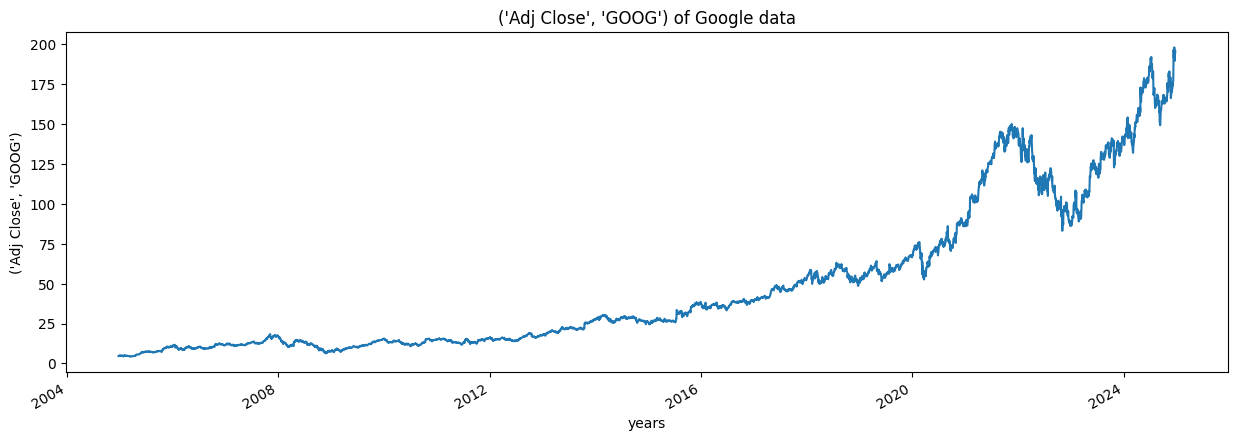

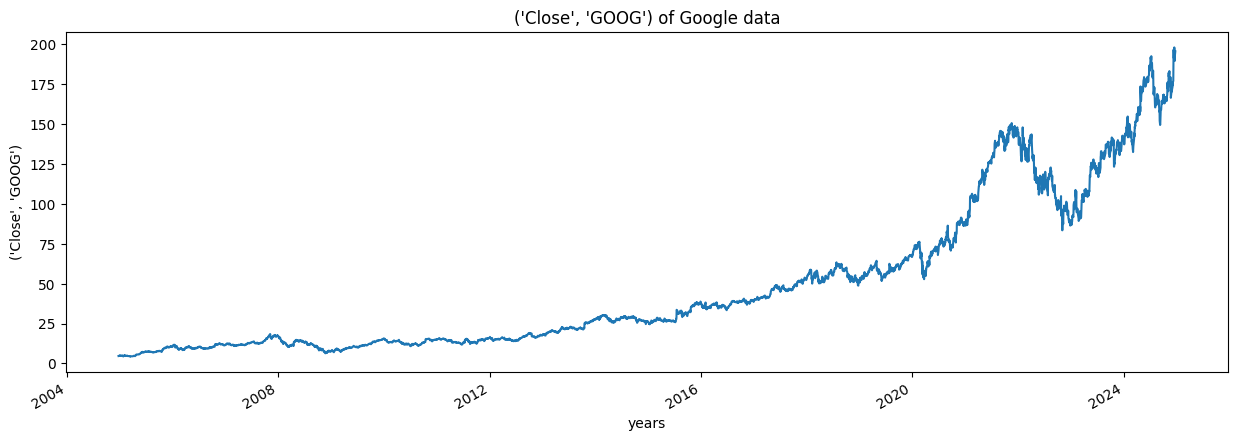

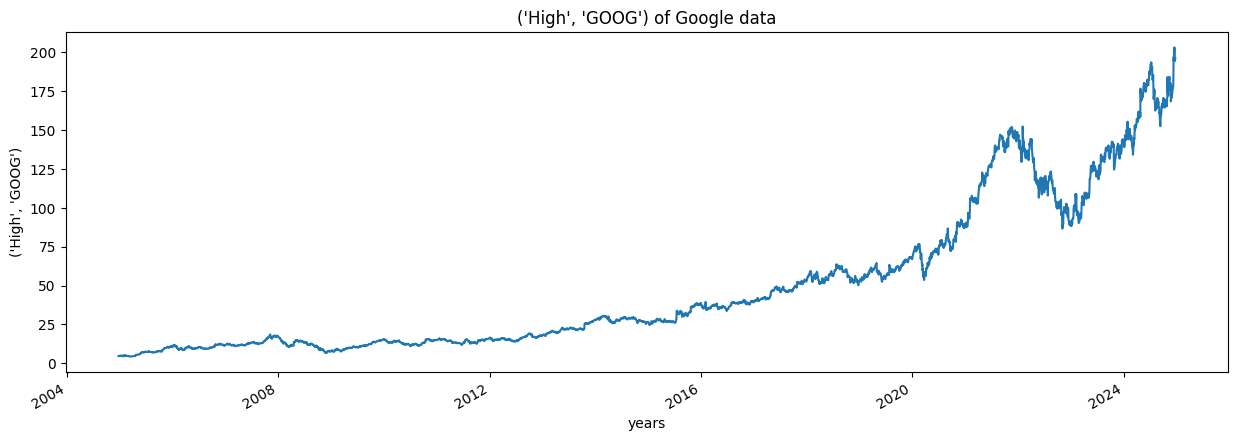

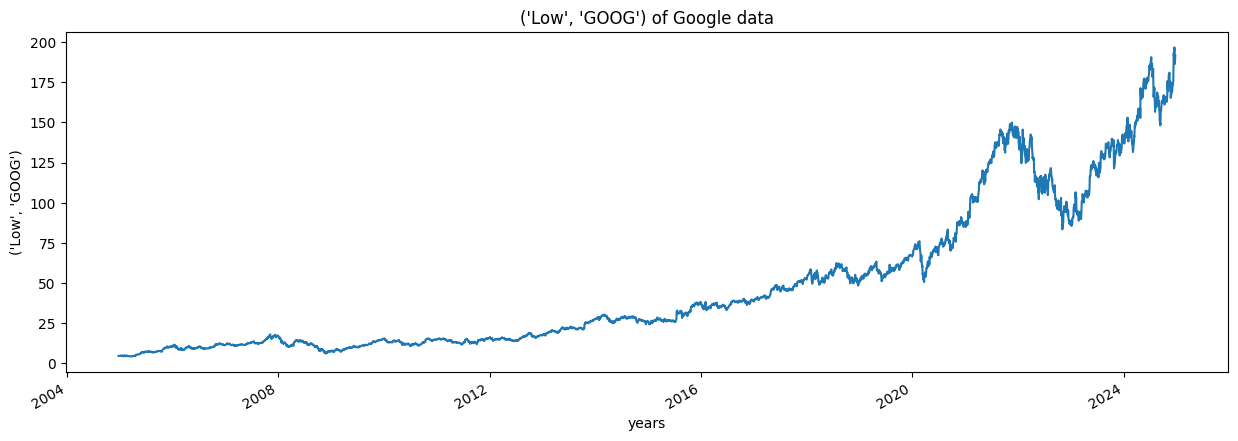

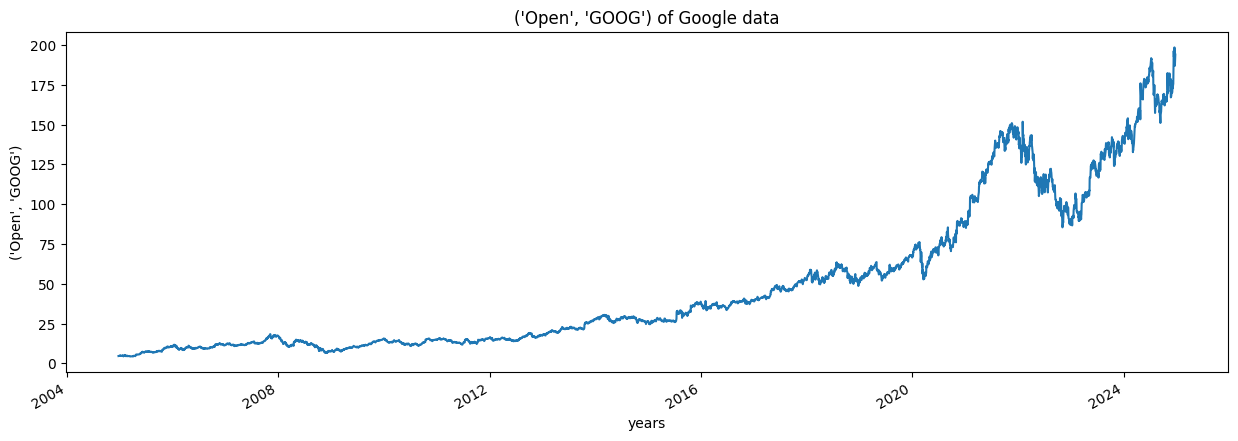

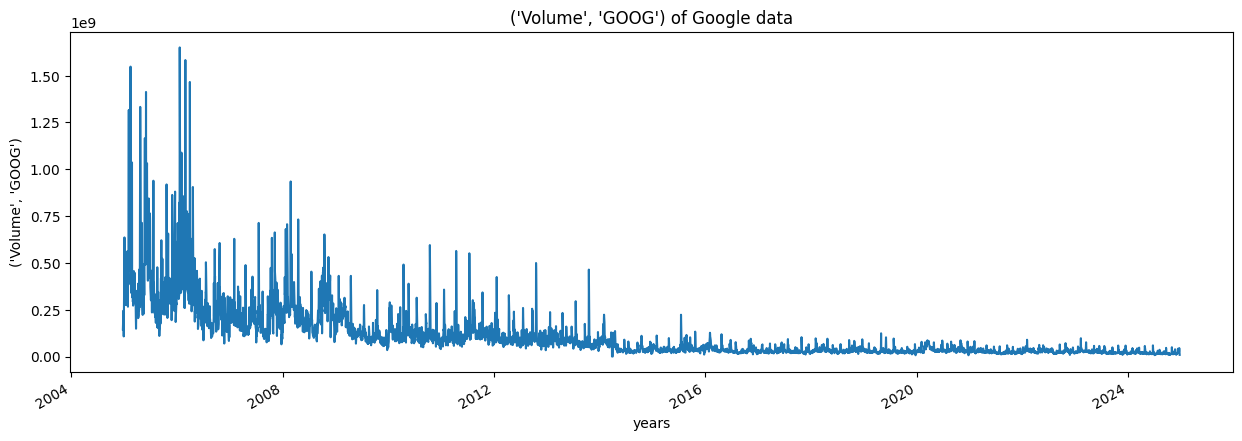

In [14]:
for column in google_data.columns:
    plot_graph((15,5),google_data[column], column)

In [15]:
# 10, 20, 30, 40, 50, 60, 70, 80, 90, 100

# MA for 5 days ==> null null null null 30 40 50 60 70 80

In [16]:
temp_data = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
print(sum(temp_data[1:6])/5)

40.0


In [17]:
import pandas as pd
data = pd.DataFrame([10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
data.head()

,0
0,10
1,20
2,30
3,40
4,50


In [18]:
data['MA'] = data.rolling(5).mean()
data

,0,MA
0,10,NaN
1,20,NaN
2,30,NaN
3,40,NaN
4,50,30.0
5,60,40.0
6,70,50.0
7,80,60.0
8,90,70.0
9,100,80.0


In [19]:
for i in range(2004,2025):
    print(i,list(google_data.index.year).count(i))

2004 6
2005 252
2006 251
2007 251
2008 253
2009 252
2010 252
2011 252
2012 250
2013 252
2014 252
2015 252
2016 252
2017 251
2018 251
2019 252
2020 253
2021 252
2022 251
2023 250
2024 247


In [20]:
google_data['MA_for_250_days'] = google_data['Adj Close'].rolling(250).mean()

In [21]:
google_data['MA_for_250_days'][0:250].tail()

,MA_for_250_days
Date,
2005-12-13,NaN
2005-12-14,NaN
2005-12-15,NaN
2005-12-16,NaN
2005-12-19,6.725115


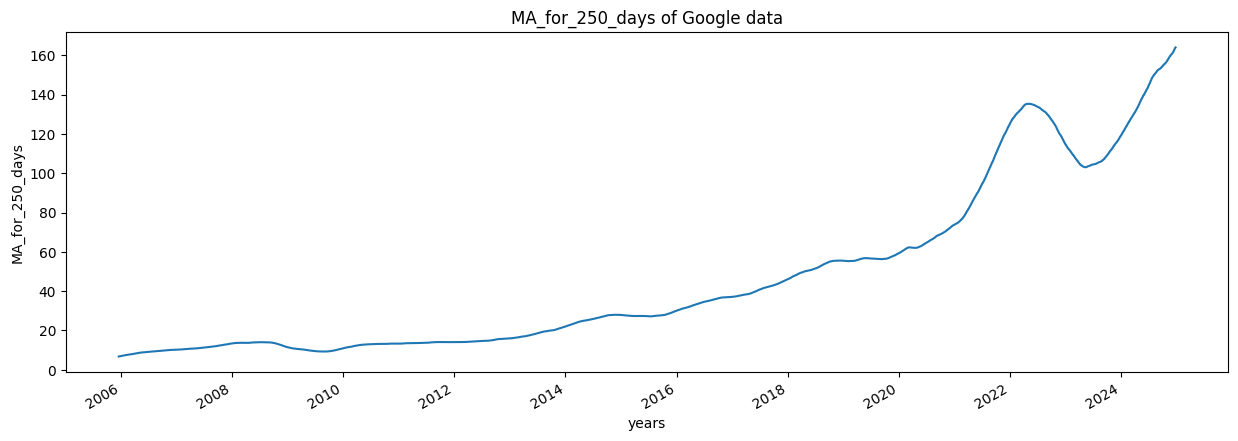

In [22]:
plot_graph((15,5), google_data['MA_for_250_days'], 'MA_for_250_days')

<Figure size 640x480 with 0 Axes>

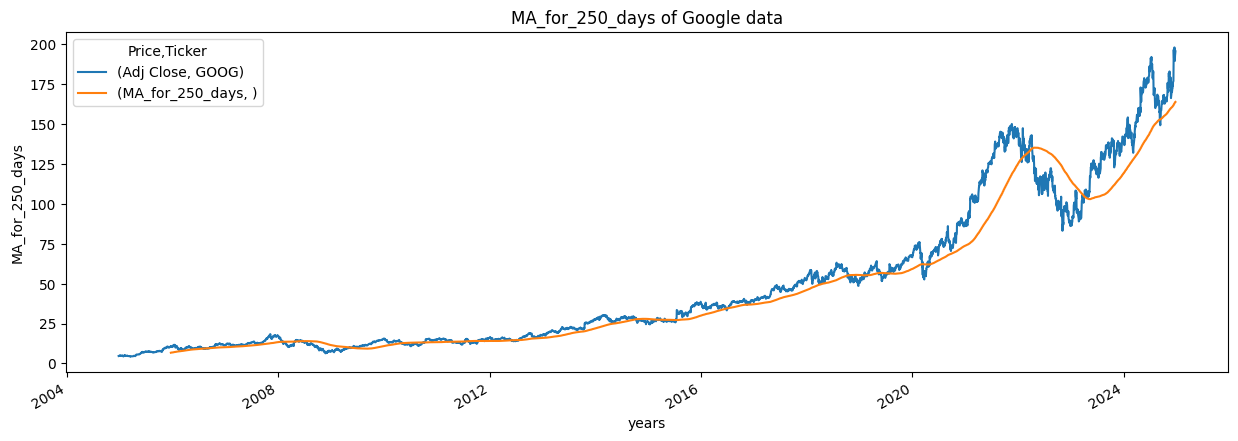

In [23]:
plot_graph((15,5), google_data[['Adj Close','MA_for_250_days']], 'MA_for_250_days')

<Figure size 640x480 with 0 Axes>

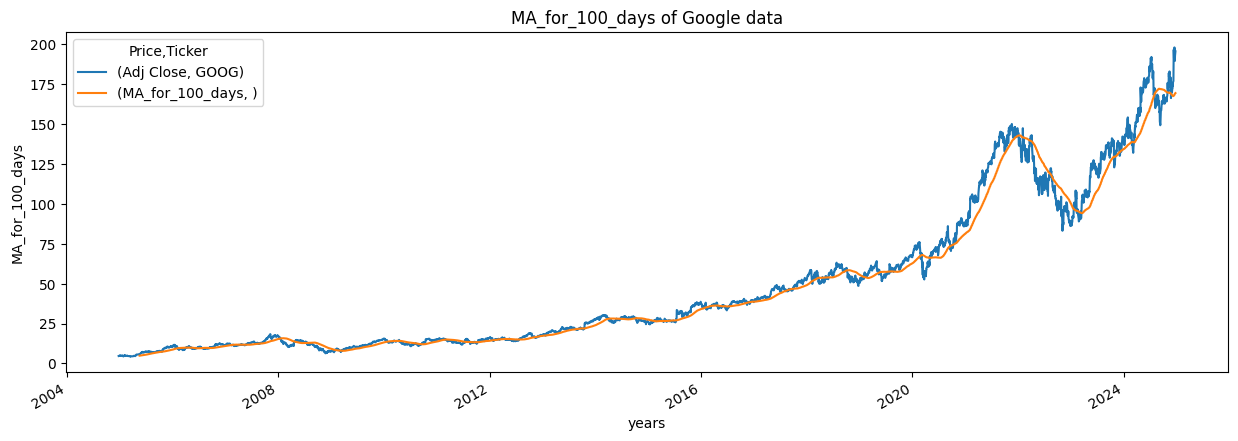

In [24]:
google_data['MA_for_100_days'] = google_data['Adj Close'].rolling(100).mean()
plot_graph((15,5), google_data[['Adj Close','MA_for_100_days']], 'MA_for_100_days')

<Figure size 640x480 with 0 Axes>

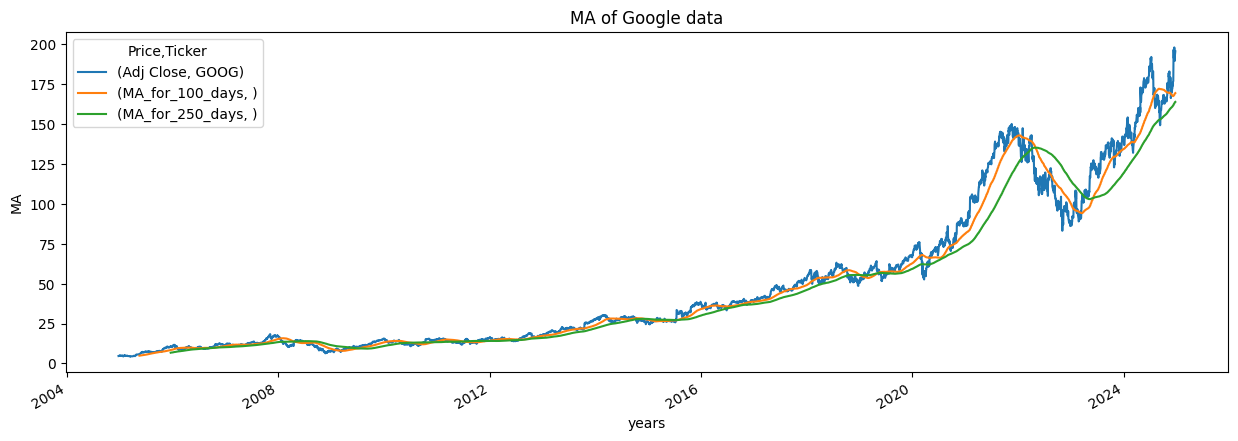

In [25]:
plot_graph((15,5), google_data[['Adj Close','MA_for_100_days', 'MA_for_250_days']], 'MA')

In [26]:
google_data['percentage_change_cp'] = google_data['Adj Close'].pct_change()
google_data[['Adj Close','percentage_change_cp']].head()

Price,Adj Close,percentage_change_cp
Ticker,GOOG,
Date,,
2004-12-23,4.663202,NaN
2004-12-27,4.762721,0.021341
2004-12-28,4.783816,0.004429
2004-12-29,4.787291,0.000726
2004-12-30,4.903933,0.024365


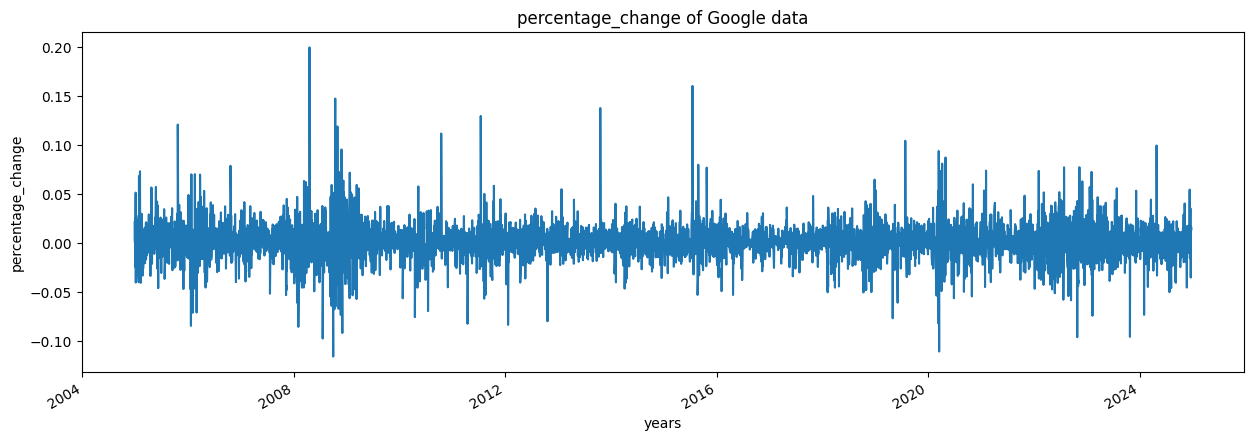

In [27]:
plot_graph((15,5), google_data['percentage_change_cp'], 'percentage_change')

In [28]:
Adj_close_price = google_data[['Adj Close']]

In [29]:
max(Adj_close_price.values),min(Adj_close_price.values)

(array([198.16000366]), array([4.34281015]))

In [30]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(Adj_close_price)
scaled_data

array([[0.00165306],
       [0.00216653],
       [0.00227537],
       ...,
       [0.95635059],
       [0.97317061],
       [0.98741081]])

In [31]:
len(scaled_data)

5034

In [32]:
x_data = []
y_data = []

for i in range(100, len(scaled_data)):
    x_data.append(scaled_data[i-100:i])
    y_data.append(scaled_data[i])

import numpy as np
x_data, y_data = np.array(x_data), np.array(y_data)

In [33]:
x_data[0],y_data[0]

(array([[1.65306352e-03],
        [2.16653074e-03],
        [2.27537184e-03],
        [2.29329716e-03],
        [2.89511412e-03],
        [2.27921473e-03],
        [3.54942773e-03],
        [2.49816887e-03],
        [2.37140491e-03],
        [1.73629842e-03],
        [2.41494135e-03],
        [2.56987754e-03],
        [2.37524535e-03],
        [2.61085041e-03],
        [2.60444886e-03],
        [3.19858495e-03],
        [3.70180280e-03],
        [2.85669745e-03],
        [2.42390155e-03],
        [1.70172464e-03],
        [7.33700686e-04],
        [2.72737484e-04],
        [1.82464570e-03],
        [1.67611844e-03],
        [1.96549946e-03],
        [2.64158129e-03],
        [2.16525141e-03],
        [3.96557270e-03],
        [4.59299833e-03],
        [3.76070099e-03],
        [2.69407793e-03],
        [3.02827963e-03],
        [2.12427855e-03],
        [1.66331289e-03],
        [1.58904311e-03],
        [2.30482093e-03],
        [2.59164330e-03],
        [2.99883054e-03],
        [2.9

In [34]:

int(len(x_data)*0.7)

3453

In [35]:
4908-100-int(len(x_data)*0.7)

1355

In [36]:
splitting_len = int(len(x_data)*0.7)
x_train = x_data[:splitting_len]
y_train = y_data[:splitting_len]

x_test = x_data[splitting_len:]
y_test = y_data[splitting_len:]

In [37]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(3453, 100, 1)
(3453, 1)
(1481, 100, 1)
(1481, 1)


In [38]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [39]:
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(64,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [40]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [41]:
model.fit(x_train, y_train, batch_size=1, epochs = 2)

Epoch 1/2
3453/3453 ━━━━━━━━━━━━━━━━━━━━ 332s 95ms/step - loss: 3.0814e-04
Epoch 2/2
3453/3453 ━━━━━━━━━━━━━━━━━━━━ 377s 94ms/step - loss: 7.9546e-05


In [42]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 128)            │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 25)                  │           1,625 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

In [43]:
predictions = model.predict(x_test)

47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step


In [44]:
predictions

array([[0.2758277 ],
       [0.2754966 ],
       [0.27273116],
       ...,
       [0.96556544],
       [0.9565479 ],
       [0.9565449 ]], dtype=float32)

In [45]:
inv_predictions = scaler.inverse_transform(predictions)
inv_predictions

array([[ 57.80296 ],
       [ 57.73879 ],
       [ 57.202797],
       ...,
       [191.486   ],
       [189.73825 ],
       [189.73766 ]], dtype=float32)

In [46]:
inv_y_test = scaler.inverse_transform(y_test)
inv_y_test

array([[ 55.56186295],
       [ 54.73881912],
       [ 54.5569725 ],
       ...,
       [189.69999695],
       [192.96000671],
       [195.72000122]])

In [47]:
rmse = np.sqrt(np.mean( (inv_predictions - inv_y_test)**2))

In [48]:
rmse

3.323176818940819

In [49]:
ploting_data = pd.DataFrame(
 {
  'original_test_data': inv_y_test.reshape(-1),
    'predictions': inv_predictions.reshape(-1)
 } ,
    index = google_data.index[splitting_len+100:]
)
ploting_data.head()

,original_test_data,predictions
Date,,
2019-02-06,55.561863,57.802959
2019-02-07,54.738819,57.738789
2019-02-08,54.556973,57.202797
2019-02-11,54.554485,56.664074
2019-02-12,55.867760,56.326611


<Figure size 640x480 with 0 Axes>

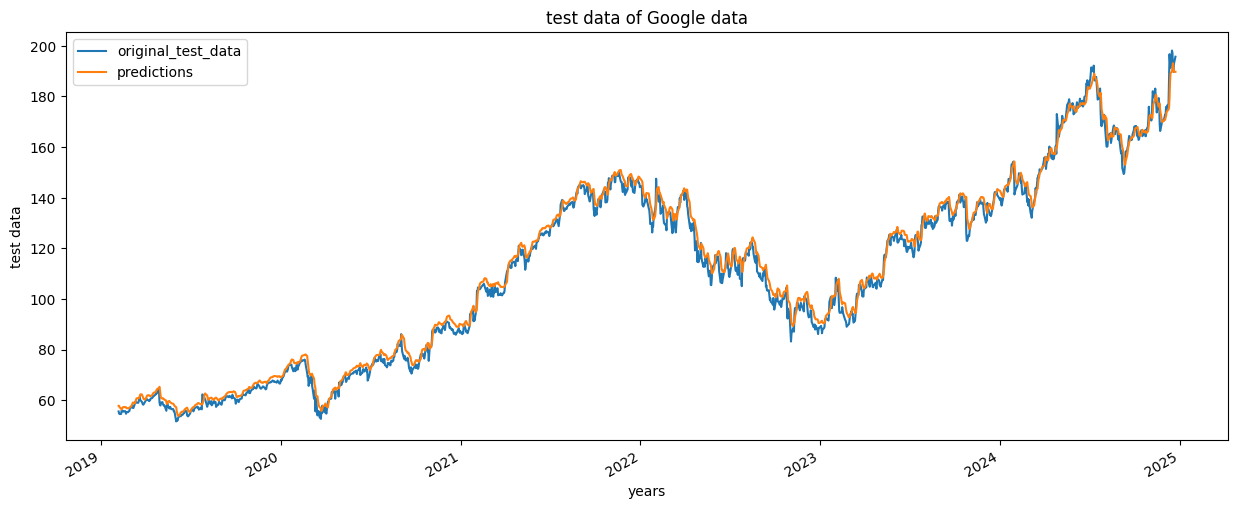

In [50]:
plot_graph((15,6), ploting_data, 'test data')

<Figure size 640x480 with 0 Axes>

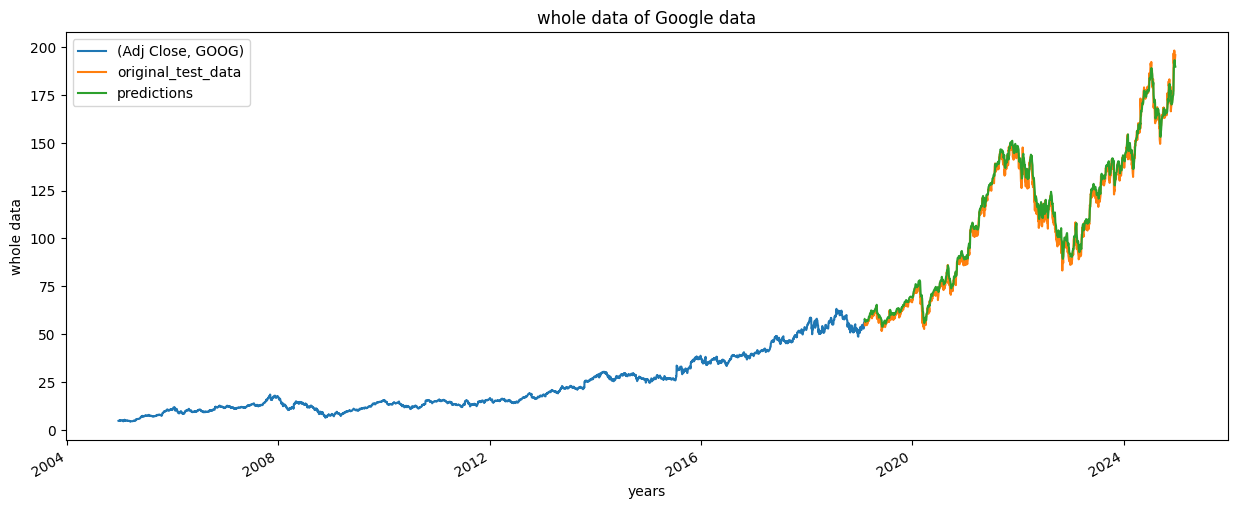

In [51]:
plot_graph((15,6), pd.concat([Adj_close_price[:splitting_len+100],ploting_data], axis=0), 'whole data')

In [52]:
model.save("Latest_stock_price_model.keras")

In [59]:

import yfinance as yf

stock = "GOOG"
google_data = yf.download(stock, period="1mo")

# Reset the index to make 'Date' a column
google_data = google_data.reset_index()

# Now you can access 'Date' as a column
print(google_data[['Date', 'Adj Close']])

[*********************100%***********************]  1 of 1 completed

Price        Date   Adj Close
Ticker                   GOOG
0      2024-11-25  169.237991
1      2024-11-26  170.426651
2      2024-11-27  170.626434
3      2024-11-29  170.296799
4      2024-12-02  172.783981
5      2024-12-03  172.823944
6      2024-12-04  175.890457
7      2024-12-05  174.112473
8      2024-12-06  176.290009
9      2024-12-09  177.100006
10     2024-12-10  186.529999
11     2024-12-11  196.710007
12     2024-12-12  193.630005
13     2024-12-13  191.380005
14     2024-12-16  198.160004
15     2024-12-17  197.119995
16     2024-12-18  190.149994
17     2024-12-19  189.699997
18     2024-12-20  192.960007
19     2024-12-23  196.160004


In [61]:
# ... other imports and code ...

# If x_test is a NumPy array:
scaled_data = scaler.fit_transform(x_test.reshape(-1, 1))

# If you were able to keep x_test as a DataFrame:
# scaled_data = scaler.fit_transform(x_test[['Adj Close']])

# ... rest of your code ...

In [55]:
print(x_test.shape)

(1481, 100, 1)
